<a href="https://colab.research.google.com/github/joycedenny/introduction-to-python/blob/main/introduction_to_python16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data=files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd 
dataframe=pd.read_csv('diabetes.csv')

In [3]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x=dataframe.drop('Outcome',1)
y=dataframe.Outcome

<ipython-input-4-e7aae454f8b8>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=dataframe.drop('Outcome',1)


In [5]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [6]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=8)

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree=tree.fit(x_train,y_train)
predictedy=tree.predict(x_test)
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,predictedy)

In [14]:
from sklearn.tree import export_graphviz
from io import StringIO 

In [15]:
dotdata=StringIO()
export_graphviz(tree,out_file=dotdata,filled=True,rounded=True,special_characters=True,class_names=['0','1'])
print(dotdata.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<X<SUB>1</SUB> &le; 127.5<br/>gini = 0.45<br/>samples = 537<br/>value = [353, 184]<br/>class = 0>, fillcolor="#f3c3a0"] ;
1 [label=<X<SUB>7</SUB> &le; 28.5<br/>gini = 0.291<br/>samples = 334<br/>value = [275, 59]<br/>class = 0>, fillcolor="#eb9c63"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<X<SUB>5</SUB> &le; 30.9<br/>gini = 0.162<br/>samples = 191<br/>value = [174, 17]<br/>class = 0>, fillcolor="#e88d4c"] ;
1 -> 2 ;
3 [label=<X<SUB>0</SUB> &le; 7.5<br/>gini = 0.037<br/>samples = 107<br/>value = [105, 2]<br/>class = 0>, fillcolor="#e5833d"] ;
2 -> 3 ;
4 [label=<X<SUB>6</SUB> &le; 0.668<br/>gini = 0.019<br/>samples = 106<br/>value = [105, 1]<br/>class = 0>, fillcolor="#e5823b"] ;
3 -> 4 ;
5 [label=<gini = 0.0<br/>samples = 92<br/>value = [92, 0]<br/>class = 0>, fillcolor="#e58139"] ;
4 -> 5 ;
6 [label=<X<SUB>6</SUB> &le; 0

In [17]:
import pydotplus
graph=pydotplus.graph_from_dot_data(dotdata.getvalue())
graph.write_png('tree_for_diabete.png')

True

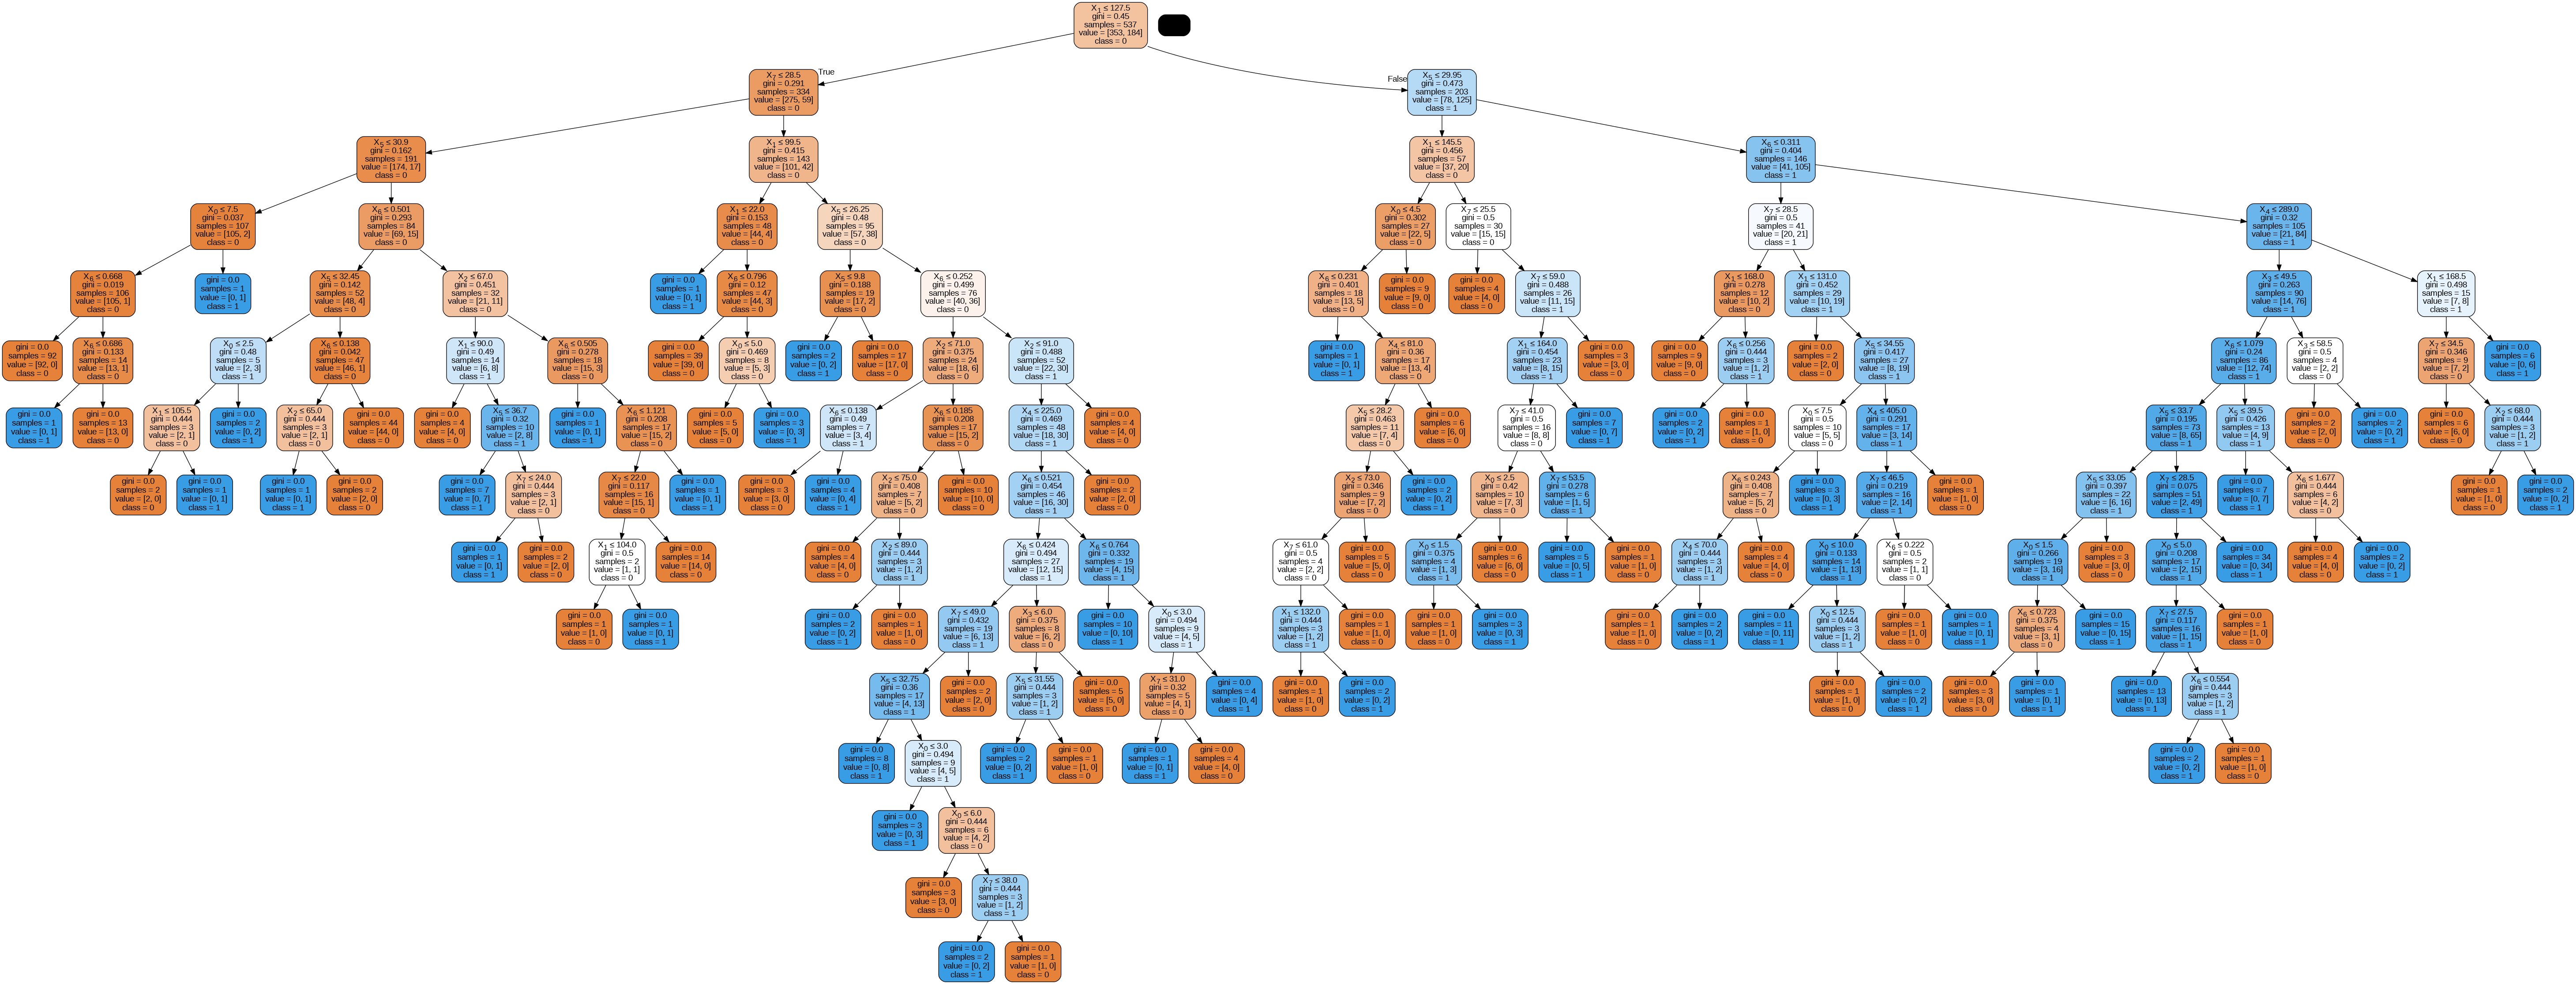

In [18]:
from IPython.display import Image
Image(graph.create_png())

In [30]:
from google.colab import files
data=files.upload()

Saving titanic.csv to titanic (1).csv


In [31]:
import pandas as pd
dataframe=pd.read_csv("titanic.csv")
dataframe.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Survived
0,1,3,1,34.5,1,0,0
1,2,1,0,47.0,1,0,1
2,3,3,0,62.0,0,0,1
3,4,1,0,27.0,1,0,1
4,5,3,1,22.0,0,0,0


In [32]:
x=dataframe.drop('Survived',1)
y=dataframe.Survived

<ipython-input-32-ef72e68a3712>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=dataframe.drop('Survived',1)


In [33]:
print(x)

     PassengerId  Pclass  Sex   Age  SibSp  Parch
0              1       3    1  34.5      1      0
1              2       1    0  47.0      1      0
2              3       3    0  62.0      0      0
3              4       1    0  27.0      1      0
4              5       3    1  22.0      0      0
..           ...     ...  ...   ...    ...    ...
886          887       2    1  34.0      0      0
887          888       1    0   5.0      0      0
888          889       3    0  52.0      1      2
889          890       1    1  36.0      0      0
890          891       3    1   4.0      0      0

[891 rows x 6 columns]


In [34]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=50)

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree=tree.fit(x_train,y_train)
predictedy=tree.predict(x_test)

In [37]:
from sklearn import  metrics
accuracy=metrics.accuracy_score(y_test,predictedy)
print(accuracy)

0.7286995515695067


In [38]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree=tree.fit(x_train,y_train)
predictedy=tree.predict(x_test)
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,predictedy)

In [39]:
from sklearn.tree import export_graphviz
from io import StringIO 

In [40]:
dotdata=StringIO()
export_graphviz(tree,out_file=dotdata,filled=True,rounded=True,special_characters=True,class_names=['0','1'])
print(dotdata.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<X<SUB>2</SUB> &le; 0.5<br/>gini = 0.471<br/>samples = 445<br/>value = [276, 169]<br/>class = 0>, fillcolor="#f5ceb2"] ;
1 [label=<X<SUB>1</SUB> &le; 2.5<br/>gini = 0.42<br/>samples = 163<br/>value = [49, 114]<br/>class = 1>, fillcolor="#8ec7f0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<X<SUB>3</SUB> &le; 0.415<br/>gini = 0.165<br/>samples = 88<br/>value = [8, 80]<br/>class = 1>, fillcolor="#4da7e8"] ;
1 -> 2 ;
3 [label=<X<SUB>0</SUB> &le; 50.5<br/>gini = 0.444<br/>samples = 12<br/>value = [4, 8]<br/>class = 1>, fillcolor="#9ccef2"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 1<br/>value = [1, 0]<br/>class = 0>, fillcolor="#e58139"] ;
3 -> 4 ;
5 [label=<X<SUB>0</SUB> &le; 167.0<br/>gini = 0.397<br/>samples = 11<br/>value = [3, 8]<br/>class = 1>, fillcolor="#83c2ef"] ;
3 -> 5 ;
6 [label=<gini = 0.0<br/>samples = 4<br/>v

In [42]:
import pydotplus
graph=pydotplus.graph_from_dot_data(dotdata.getvalue())
graph.write_png('tree_for_titanic.png')

True

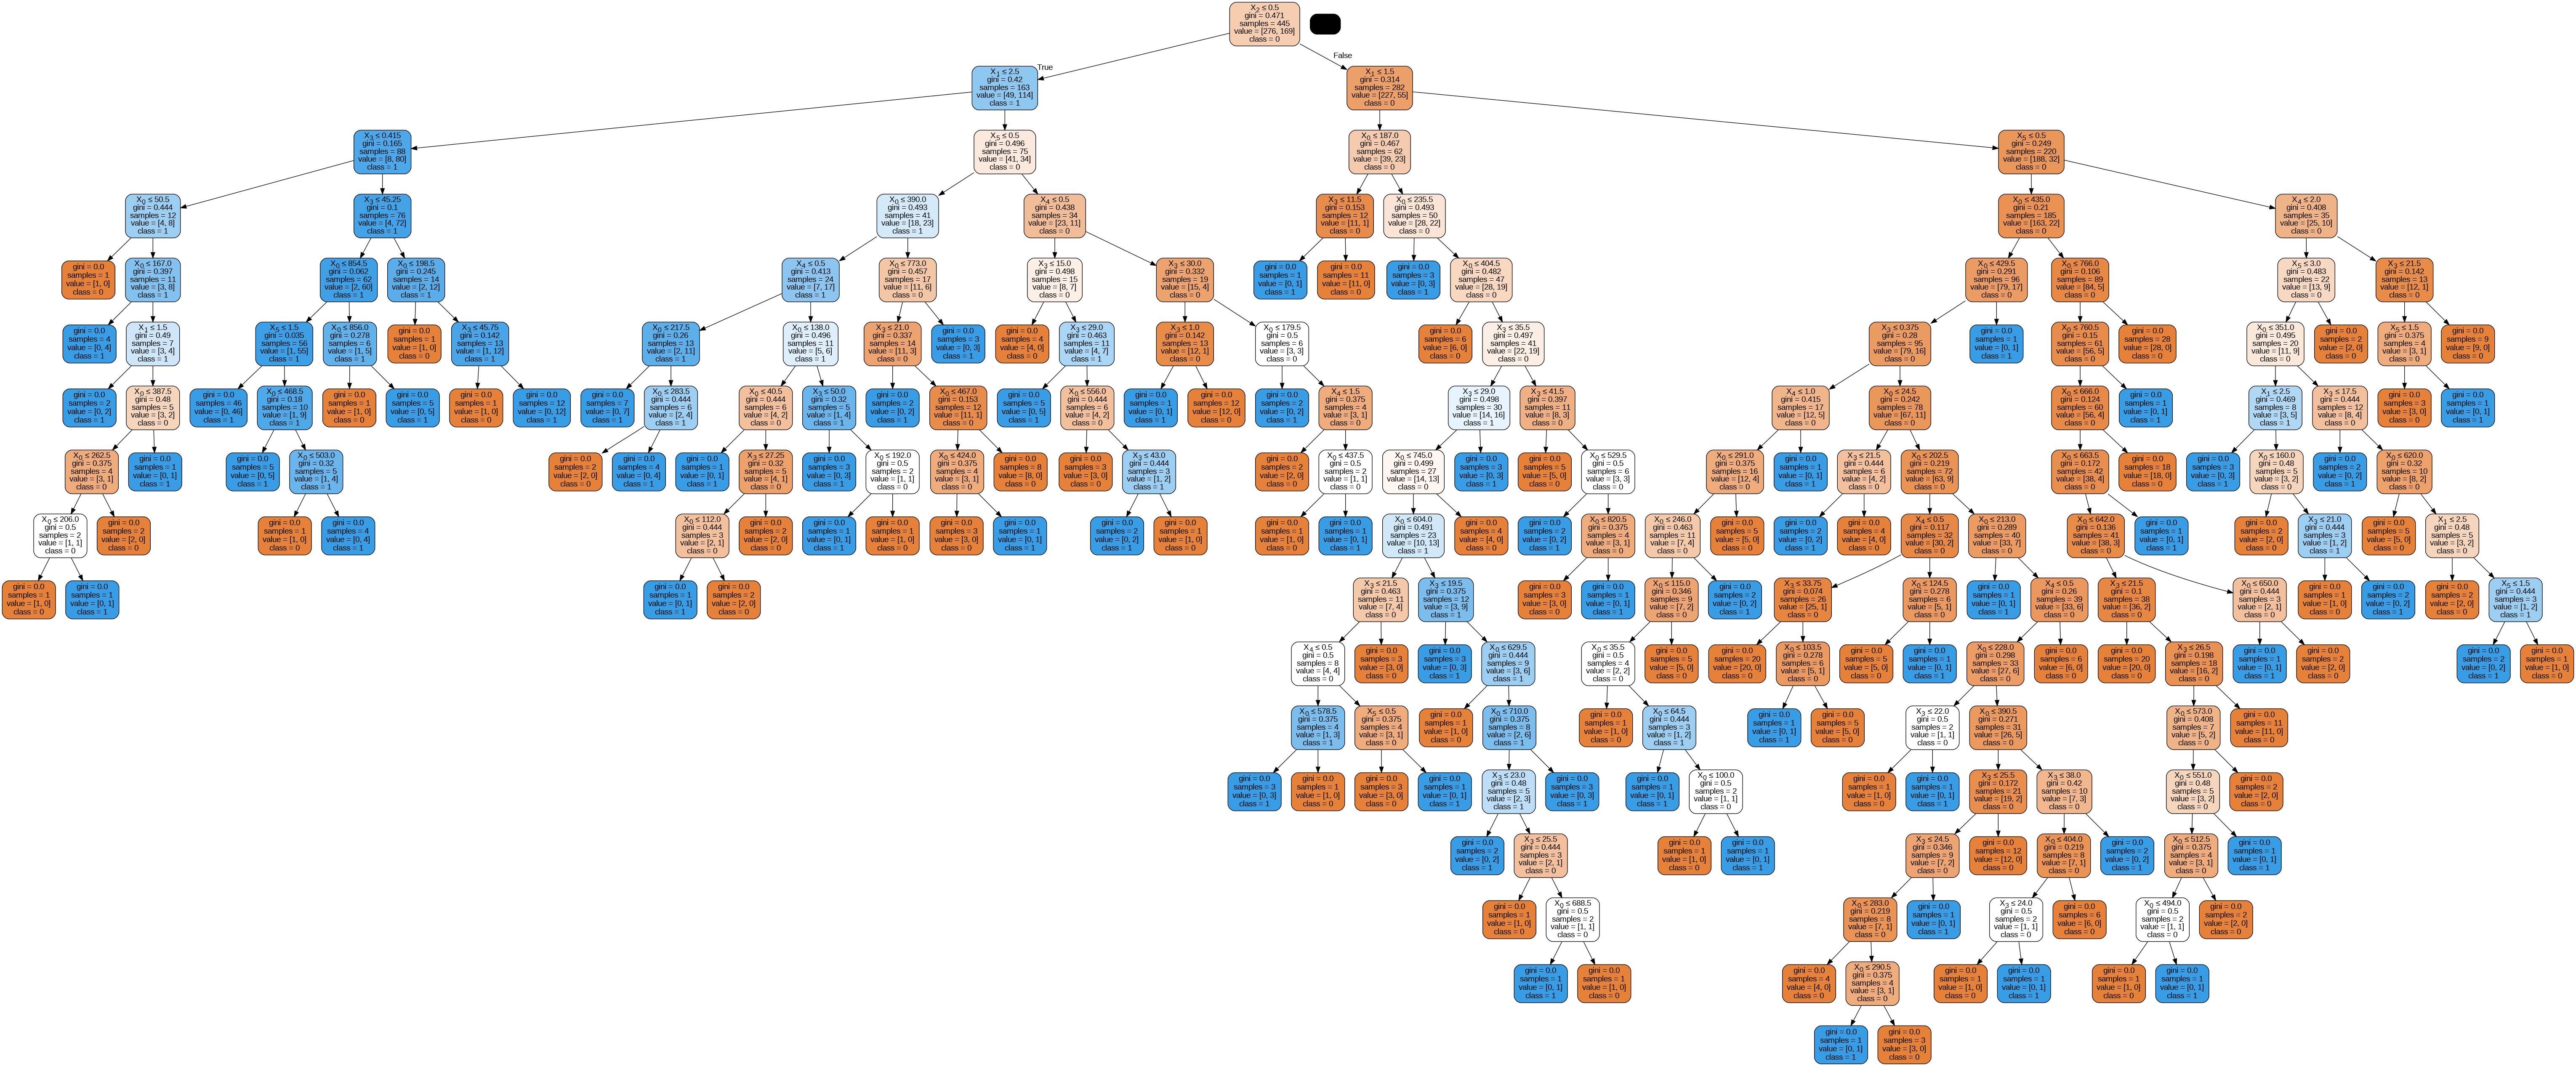

In [43]:
from IPython.display import Image
Image(graph.create_png())